# Assignment 2: Weather

Task: Create a jupyter notebook with a plot of the dryBulbTemperature_Celsius over time.

The csv file contains weather data from the Athenry station from 4.15 pm on the 2nd of October to 3pm on the 3rd October 2024.


In [35]:
# Import the required modules.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt

In [36]:
# Load the csv file, parsing the date column as the datetime datatype.
# Set the date column as the index.
# Only the columns required for the task will be loaded.
df = pd.read_csv("data\weatherreadings1.csv", 
                usecols = ['reportStartDateTime','dryBulbTemperature_Celsius'],
                parse_dates = ['reportStartDateTime'],
                index_col=['reportStartDateTime'])

In [37]:
# Explore the dataset
df.head()

,dryBulbTemperature_Celsius
reportStartDateTime,
2024-10-02 16:15:00+00:00,15.944444
2024-10-02 16:45:00+00:00,15.777778
2024-10-02 17:00:00+00:00,15.111111
2024-10-02 17:15:00+00:00,14.277778
2024-10-02 17:30:00+00:00,13.666667


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2024-10-02 16:15:00+00:00 to 2024-10-03 15:00:00+00:00
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dryBulbTemperature_Celsius  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [39]:
df['dryBulbTemperature_Celsius'].agg(['min', 'max'])

min     9.166667
max    15.944444
Name: dryBulbTemperature_Celsius, dtype: float64

In [40]:
plt.style.use('seaborn-v0_8')

__Date Formatters__

Matplotlib as a built in converter, [matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html) that will to handle any columns with a datetime data type. 

``ConsiseDateFormatter`` is used to display the date in the best format and as compact as possible. An alternative to ConsiseDateFormatter is ``AutoDateFormatter``. The matplotlib documentation demonstrates how to [customise the `ConsiseDateFormatter`](https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html#localization-of-date-formats) if the user would like a different date format.

``AutoDateLocator`` picks the best ``DateLocator`` to set the position, number and increments of the time axis ticks. There are a range of `DateLocators` available such as `HourLocator` if a different locator is required.

Date formatters and date locators are most useful when used together. For this task the `AutoDateLocator` has a tick mark every three hours and the `ConsiseDateFormatter` has chosen the format for the date at 00:00 and for the date displayed at bottom right of the plot in ISO format.

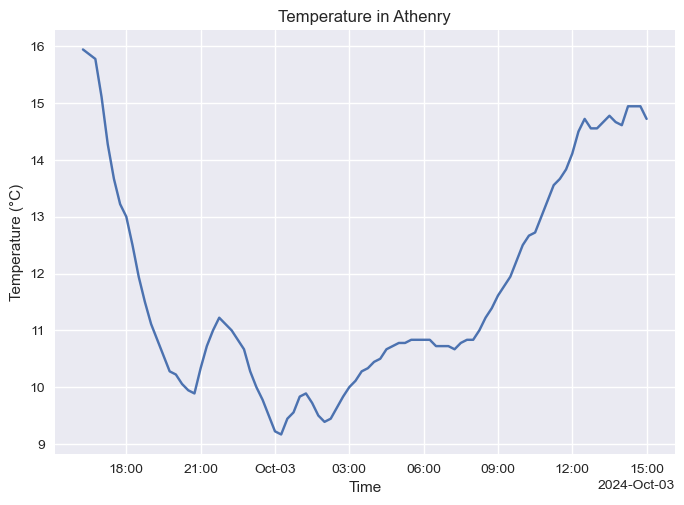

In [46]:
# Plotting using ConsiseDateFormatter
fig, ax = plt.subplots()

# AutoDateLocator
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)

# ConciseDateFormatter 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)

# Plot the data
ax.plot(df.index, df['dryBulbTemperature_Celsius'])
ax.set(xlabel='Time',
       ylabel = 'Temperature (°C)',
       title = 'Temperature in Athenry')

plt.show()

Another method to format the major and minor ticks using set_major_formatter() and set_minor_formatter() is shown below. Adjusting the parameters used changes the ticks on the x-axis.

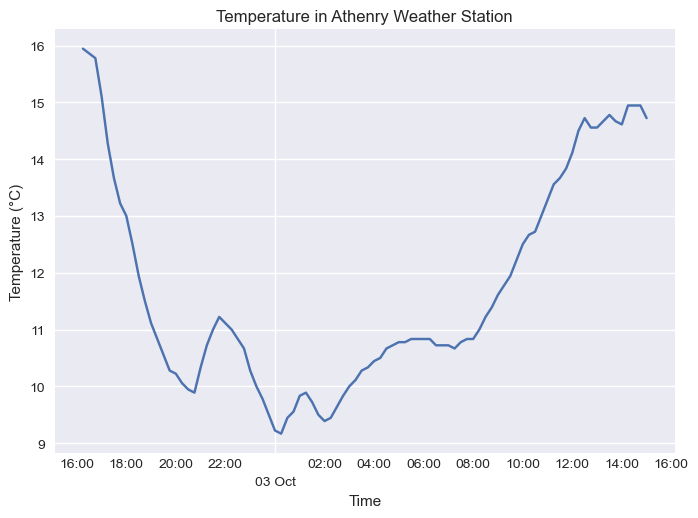

In [ ]:
# Plot the Temperature
fig, ax = plt.subplots()

plt.plot(df.index, df['dryBulbTemperature_Celsius'])

ax.set(xlabel='Time',
       ylabel = 'Temperature (°C)',
       title = 'Temperature in Athenry Weather Station')

# Turn on minor ticks on x-axis
ax.tick_params(axis='x', which='minor', bottom=True)

# Minor ticks every 3 hours with the format of Hour:Minute
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3)) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%S'))

# Major ticks on a new date
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))

plt.show()

### References



__General Matplotlib References__

[Chapter 4. Visualisation with Matplotlib](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

[Convert columns into datetime when using pandas to read csv files](https://khuyentran1401.github.io/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter3/date_time.html)

__Using set_major_formatter__

[Matplotlib won't follow date format set by set_major_formatter or set_minor_formatter for some datasets](https://stackoverflow.com/questions/72969795/matplotlib-wont-follow-date-format-set-by-set-major-formatter-or-set-minor-form)

[Customize Dates on Times Series Plots in Python Using Matplotlib](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/)

[Matplottib won't show minor ticks when using subplots](https://stackoverflow.com/questions/56657712/matplotlib-wont-show-minor-ticks-when-using-subplots)

[How to turn on minor ticks on y axis](https://stackoverflow.com/questions/12711202/how-to-turn-on-minor-ticks-only-on-y-axis)

[strftime-and-strptime-format-codes](strfhttps://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

[Tick locating and formatting](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter)

__ConsiseDateFormatter References__

[Formatting Date ticks using ConsiseDateFormatter](#https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html)

[Useful Python, Compactly display the date](https://www.useful-python.com/en/matplotlib-datetime/#index_id7)
